In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

from sklearn.datasets import load_iris
from matplotlib import rc
import random
import collections
from sklearn.datasets import make_blobs

In [2]:
def jFun(lamda, x, y, theta, theta_0):
    n=len(y)
    list_Lh=[]
    for i in range(0,n,1):
        dot_product = np.dot(theta,x[i])
        validation = y[i]*(dot_product+theta_0)
        if validation<1:
            list_Lh.append(1-validation)
        else:
            list_Lh.append(0)
    mean = np.mean(list_Lh)
    return (mean+((lamda/2)*np.dot(theta,theta)))

def thetaF(lamda, x, y, theta, theta_0, eta):
    n = len(y)
    list_aux=[]
    for i in range(0,n,1):
        dot_product=np.dot(theta,x[i])
        validation = y[i]*(dot_product+theta_0)
        if validation<1:
            list_aux.append(-y[i]*x[i])
        else:
            list_aux.append(0)
    mean = np.mean(list_aux)
    return (theta-(eta*(mean + lamda*theta)))

def theta_0F(lamda, x, y, theta, theta_0, eta):
    n = len(y)
    list_aux=[]
    for i in range(0,n,1):
        dot_product=np.dot(theta,x[i])
        validation = y[i]*(dot_product+theta_0)
        if validation<1:
            list_aux.append(-y[i])
        else:
            list_aux.append(0)
    mean = np.mean(list_aux)
    return (theta_0-(eta*(mean)))

In [3]:
def SVMGradDesc(the, the_0, x, y, eta, lamda):
    theta = the
    theta_0 = the_0
    #theta = x[0]
    #theta_0 = y[0]
    lista_thetas = []
    #lista_thetas.append((-theta_0/theta[1],-theta[0]/theta[1]))
    resta = 1
    while(resta>.0001):
        theta2 = theta
        theta_02 = theta_0
        theta = thetaF(lamda, x,y, theta2, theta_02, eta)
        theta_0 = theta_0F(lamda, x,y, theta2, theta_02, eta) 
        lista_thetas.append((-theta_0/theta[1],-theta[0]/theta[1]))
        j0 = jFun(lamda, x, y, theta2, theta_02)
        j1 = jFun(lamda, x, y, theta, theta_0)
        resta = abs(j1-j0)
    
    return theta, theta_0, lista_thetas

In [4]:
def classifier(theta,theta_0,x,y):
    n = len(y)
    list_classification=[]
    for j in range (0,n,1):
        dot_product=(np.dot(x[j],theta)+theta_0)
        if y[j]*dot_product<=0:
            list_classification.append(0)
        else:
            list_classification.append(y[j])
    return list_classification

def validation(classi,y):
    y=np.array(y)
    l=y==classi
    return (np.size(l[l==False]))

In [5]:
def crossValidate(x,y,k):
    n = np.shape(x)[0]
    div = int(n/k)
    list_k = range(0,n+1,div)
    list_subsets_x=[]
    list_subsets_y=[]
    list_lambdas = [0.01,.1,.2,.5,1,2,5,10,100]
    eta = .1
    theta_inic = x[0]
    theta_0_inic = y[0]
    tol = .0001
    lista_medias_errores=[]
    for lambdas in list_lambdas:
        lista_errores=[]
        for k in list_k:
            list_subsets_x=np.concatenate((x[0:k],x[k+div:]))
            list_subsets_y=np.concatenate((y[0:k],y[k+div:]))
            list_test_x=x[k:k+div]
            list_test_y=y[k:k+div]
            theta, theta_0, lista_thetas=SVMGradDesc(theta_inic, theta_0_inic, list_subsets_x, 
                                                     list_subsets_y ,eta, lambdas)
            list_class=classifier(theta,theta_0,list_test_x,list_test_y)
            errors=validation(list_class,list_test_y)
            lista_errores.append(errors)
        lista_medias_errores.append(np.mean(lista_errores))
    return lista_medias_errores,list_lambdas

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]),
 array([0, 0, 0, 1, 1]))

In [7]:
y[y==0]=-1

In [8]:
lista_medias_errores,list_lambdas=crossValidate(X,y,5)

/Users/robertodelriosalgado/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
/var/folders/9j/5g2kcd8x5y1gth6pxchhjdp80000gn/T/ipykernel_26890/4023600823.py:17: RuntimeWarning: invalid value encountered in double_scalars
  resta = abs(j1-j0)


In [9]:
data=[list_lambdas,lista_medias_errores]
df = pd.DataFrame(data).T
df.columns=['Lambdas','Media de Errores']
df

Lambdas  Media de Errores
0     0.01          8.833333
1     0.10          7.833333
2     0.20          8.000000
3     0.50          8.000000
4     1.00          7.666667
5     2.00          7.666667
6     5.00         26.833333
7    10.00         83.333333
8   100.00         94.333333

In [10]:
random_list = random.sample(range(0,1000,1),1000)
X=X[random_list,:]
y=y[random_list]
X_train=X[:800,:]
X_test=X[800:,:]
y_train=y[:800]
y_test=y[800:]

#from numpy import random
lamda = 1
#eta = .01
eta = .1
theta_inic = X_train[0]
theta_0_inic = y_train[0]
#theta_inic = np.array([0,0])
#theta_0_inic=0
tol = .0001

theta, theta_0, lista_thetas=SVMGradDesc(theta_inic, theta_0_inic, X_train, y_train ,eta, lamda)
lista_thetas=lista_thetas[-50:]



/Users/robertodelriosalgado/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


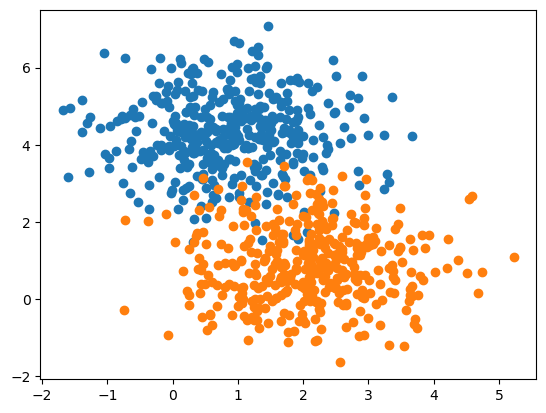

In [11]:
fig, ax = plt.subplots()
line, = ax.plot([], [], 'k-') 
for label in [-1, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)

In [12]:
def anima(i):
    z = lista_thetas[i][0] + lista_thetas[i][1] * x
    line.set_data(x, z)
    return line,

animacion = animation.FuncAnimation(fig, anima, frames=len(lista_thetas), interval=100, blit=True)
rc('animation', html='jshtml')
animacion

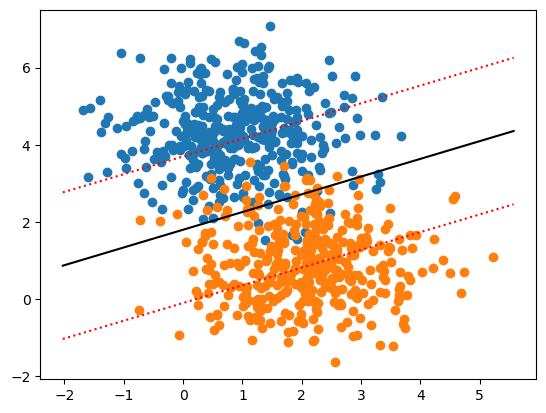

In [13]:
z1=(lista_thetas[-1][0] + 1/np.sqrt(np.dot(theta,theta) ))+ lista_thetas[-1][1] * x
z2=(lista_thetas[-1][0] - 1/np.sqrt(np.dot(theta,theta) ))+ lista_thetas[-1][1] * x

ax.plot(x,z1,'r:')
ax.plot(x,z2,'r:')

fig

In [14]:
list_classification=classifier(theta,theta_0,X_test,y_test)
result=list_classification==y_test

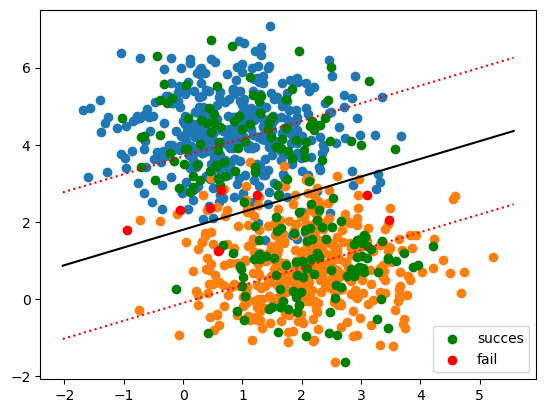

In [15]:
ax.scatter(X_test[result==True, 0], X_test[result==True, 1], c='g', label='succes')
ax.scatter(X_test[result==False, 0], X_test[result==False, 1], c='red', label='fail')
ax.legend(loc='lower right')
fig

## SGD

In [16]:
def thetaFE(lamda, x, y, theta, theta_0, eta,n):
    dot_product=np.dot(theta,x)
    validation = y*(dot_product+theta_0)
    if validation<1:
        res= theta-(eta*(-1*x*y + (lamda/n)*theta))
    else:
        res = theta - eta*((lamda/n)*theta)
    return res

def theta_0FE(lamda, x, y, theta, theta_0, eta):
    dot_product=np.dot(theta,x)
    validation = y*(dot_product+theta_0)
    if validation<1:
        res = theta_0 - (eta*y) 
    else:
        res = theta_0 
    return res

In [17]:
def SGD2(the, the_0, x, y, lamda):
    n=len(y)
    theta = the
    theta_0 = the_0
    #theta = x[0]
    #theta_0 = y[0]
    lista_thetas = []
    #lista_thetas.append((-theta_0/theta[1],-theta[0]/theta[1]))
    resta = 1
    t=1
    while(resta>=.00001):
        eta=1/t
        t=t+1
        indice = random.choice(range(1,n,1))
        theta2 = theta
        theta_02 = theta_0
        theta = thetaFE(lamda, x[indice],y[indice], theta2, theta_02, eta,n)
        theta_0 = theta_0FE(lamda, x[indice],y[indice], theta2, theta_02, eta) 
        theta_0 = theta_0FE(lamda, x[indice],y[indice], theta2, theta_02, eta) 
        lista_thetas.append((-theta_0/theta[1],-theta[0]/theta[1]))
        j0 = jFun(lamda, x, y, theta2, theta_02)
        j1 = jFun(lamda, x, y, theta, theta_0)
        resta = abs(j1-j0)
    
    return theta, theta_0, lista_thetas

In [18]:
X2, y2 = make_blobs(n_samples=1000, centers=2, random_state=0)

In [19]:
y2[y2==0]=-1

In [20]:
random_list = random.sample(range(0,1000,1),1000)
X2=X2[random_list,:]
y2=y2[random_list]
X2_train=X2[:800,:]
X2_test=X2[800:,:]
y2_train=y2[:800]
y2_test=y2[800:]


In [21]:
lamda = 1.5
#eta = .01
eta = .1
theta_inic = X2_train[0]
theta_0_inic = y2_train[0]
#theta_inic = np.array([0,0])
#theta_0_inic=0
#T = 100

theta2, theta_02, lista_thetas2=SGD2(theta_inic, theta_0_inic, X2_train, y2_train , lamda)

In [22]:
lista_thetas2=lista_thetas2[-50:]

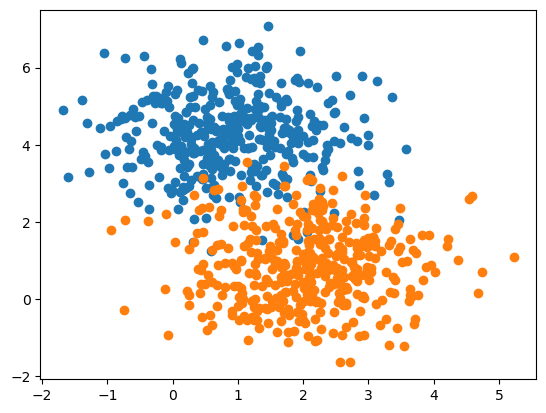

In [23]:
fig2, ax2 = plt.subplots()
line2, = ax2.plot([], [], 'k-') 
for label in [-1, 1]:
    mask2 = (y2_train == label)
    ax2.scatter(X2_train[mask2, 0], X2_train[mask2, 1])
x = np.linspace(ax2.get_xlim()[0], ax2.get_xlim()[1], 200)

In [24]:
def anima(i):
    z = lista_thetas2[i][0] + lista_thetas2[i][1] * x
    line2.set_data(x, z)
    return line2,

animacion2 = animation.FuncAnimation(fig2, anima, frames=len(lista_thetas2), interval=100, blit=True)
rc('animation', html='jshtml')
animacion2

In [25]:
list_classification2=classifier(theta2,theta_02,X2_test,y2_test)
result2=list_classification2==y2_test

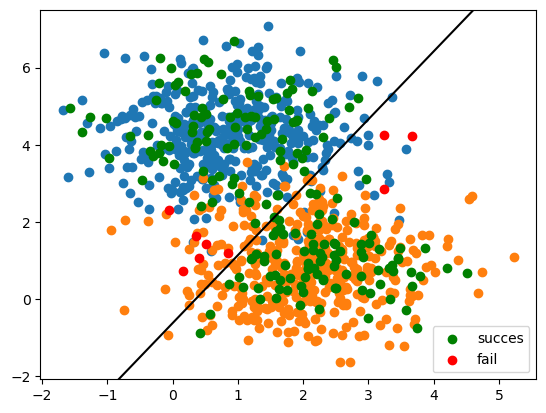

In [26]:
ax2.scatter(X2_test[result2==True, 0], X2_test[result2==True, 1], c='g', label='succes')
ax2.scatter(X2_test[result2==False, 0], X2_test[result2==False, 1], c='red', label='fail')
ax2.legend(loc='lower right')
fig2